[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


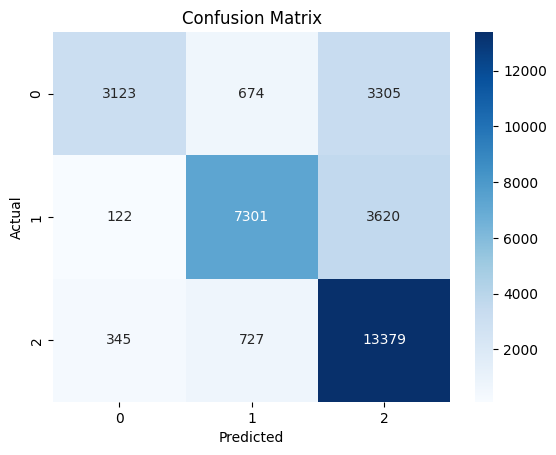

Naive Bayes Test Accuracy: 73.02%
Predictions saved to predicted_tweets.csv


In [2]:
import pandas as pd
import numpy as np
import pickle
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Twitter_Data.csv"
df = pd.read_csv(file_path)

nltk.download('stopwords')

# Text preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['cleaned_tweets'] = df['tweets'].apply(clean_text)

# Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_tweets'])
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"Naive Bayes Test Accuracy: {accuracy * 100:.2f}%")

# Save the model and vectorizer
with open("naive_bayes_model.pkl", "wb") as model_file:
    pickle.dump(nb, model_file)
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Load and test on new dataset
def predict_new_data(file_path):
    new_df = pd.read_csv(file_path)
    new_df['cleaned_text'] = new_df['Text'].apply(clean_text)

    with open("tfidf_vectorizer.pkl", "rb") as vectorizer_file:
        vectorizer = pickle.load(vectorizer_file)
    with open("naive_bayes_model.pkl", "rb") as model_file:
        model = pickle.load(model_file)

    X_new = vectorizer.transform(new_df['cleaned_text'])
    new_df['sentiments'] = model.predict(X_new)
    new_df.to_csv("predicted_tweets_nb.csv", index=False)
    print("Predictions saved to predicted_tweets.csv")

predict_new_data("preprocessed_tweets.csv")
